<span style="color:darkorange; font-size:60px">Learn Jupyter with Bloomberg</span></br>
<span style="color:lightblue; font-size:30px">The Jupyter widgets ecosystem - introduction</span>

## A common analyst workflow

In [1]:
# Importing relevant packages
import requests # Accessing APIs
import pandas as pd # Processing data
import numpy as np # Processing data
from datetime import timezone, datetime # Time data manipulation
import matplotlib.pyplot as plt # Used for plots
from utils.plot_utils import set_style # Helper function for nicer looking plots
%matplotlib inline

In [2]:
# Making plots look nicer on dark backgrounds
set_style()

In [3]:
API_TOKEN = '<YOUR_TOKEN_GOES_HERE>' # Register for a token if you want to retrieve data with the API

In [4]:
# Unix date format (number of seconds since 01/01/1970)
start_date = datetime(2010, 10, 19).replace(tzinfo=timezone.utc).timestamp()
end_date = datetime(2020, 10, 2).replace(tzinfo=timezone.utc).timestamp()

In [5]:
# Here's what they it looks like
print(start_date)

1287446400.0


In [6]:
# API call used to create currencies.csv

# currencies = requests.get('https://finnhub.io/api/v1/forex/symbol?exchange=oanda&token=<YOUR_FINNHUB_TOKEN_HERE>')
# pd.DataFrame(currencies.json()).to_csv('currencies.csv')

currencies = pd.read_csv('data/currencies.csv')

In [7]:
# Examining the available currencies
# currencies['displaySymbol'].tolist()

In [8]:
# Use pandas masking to get the corresponding row with the data we are looking for
currencies[currencies['displaySymbol'] == 'XAU/AUD']

,Unnamed: 0,description,displaySymbol,symbol
0,0,Gold/AUD,XAU/AUD,OANDA:XAU_AUD


In [9]:
# Index into the column we are interested in retrieving data for
currencies[currencies['displaySymbol'] == 'XAU/AUD']['symbol']

0    OANDA:XAU_AUD
Name: symbol, dtype: object

In [10]:
# Using tring templates in python to our advantage
request_string = 'https://finnhub.io/api/v1/forex/candle?symbol={symbol}&resolution=D&from={start_date}&to={end_date}&token={token}'.format(symbol="OANDA:XAU_AUD", token=API_TOKEN, start_date=start_date, end_date=end_date)
request_string

'https://finnhub.io/api/v1/forex/candle?symbol=OANDA:XAU_AUD&resolution=D&from=1287446400.0&to=1601596800.0&token=<YOUR_TOKEN_GOES_HERE>'

In [11]:
# Using the string
# xau_aud = requests.get(request_string)
# pd.DataFrame(xau_aud.json()).to_csv('xau_aud.csv')

In [12]:
# Close, high, low, open, status, timestamp, volume
xau_aud = pd.read_csv('data/XAU_AUD.csv')
xau_aud

,Unnamed: 0,c,h,l,o,s,t,v
0,0,1374.640,1391.210,1368.460,1383.490,ok,1287435600,26231
1,1,1363.170,1379.600,1360.230,1374.510,ok,1287522000,19952
2,2,1355.920,1368.860,1347.300,1363.250,ok,1287608400,21994
3,3,1349.840,1356.950,1342.090,1355.740,ok,1287694800,16587
4,4,1349.320,1349.320,1349.320,1349.320,ok,1287781200,1
...,...,...,...,...,...,...,...,...
2767,2767,2659.024,2662.238,2624.228,2643.017,ok,1601240400,80987
2768,2768,2658.786,2664.679,2635.322,2658.686,ok,1601326800,67043
2769,2769,2630.831,2661.027,2629.903,2659.739,ok,1601413200,88480
2770,2770,2652.649,2658.531,2629.487,2631.775,ok,1601499600,87081


In [13]:
# Notice the timestamp column. We need a more useful format.
xau_aud['t'] = xau_aud['t'].apply(datetime.fromtimestamp)

In [14]:
xau_aud.set_index('t', inplace=True)

In [15]:
# Removing the "Unnamed: 0" column from our data frame
xau_aud = xau_aud[xau_aud.columns[1:]]

In [16]:
# Friendlier name for the x-axis
xau_aud.index.rename('Date', inplace=True)

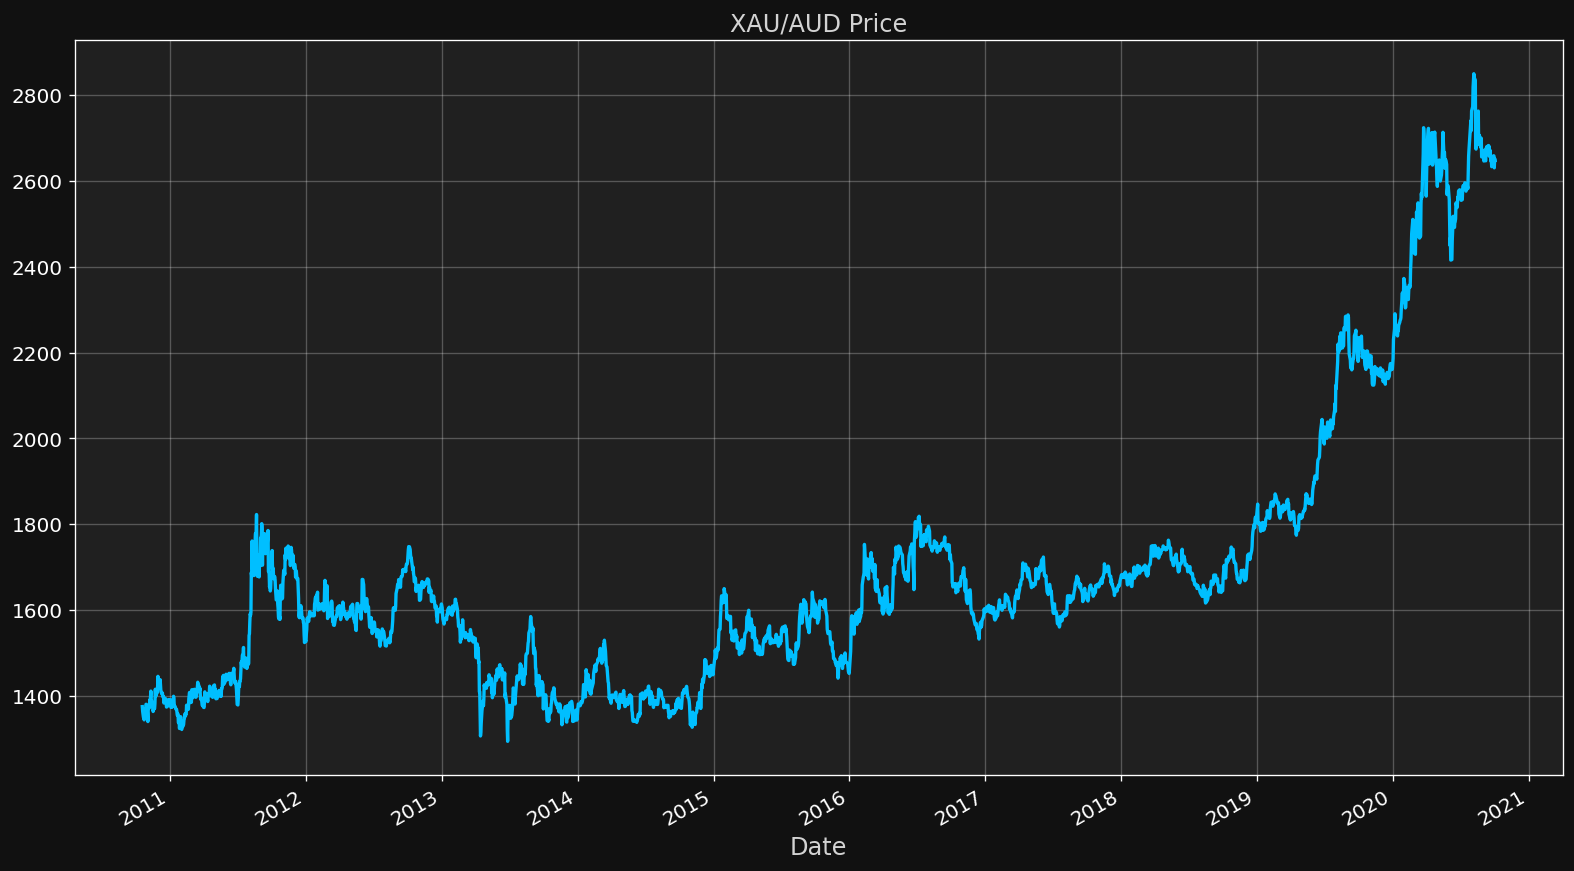

In [17]:
# Quick visualization of the closing price
plt.show(xau_aud['c'].plot(title='XAU/AUD Price', figsize=(16,9)));

### This workflow is great for a one-off. But it can be challenging if needs to be reproduced for each currency:
* Getting the right symbol from the dataframe and typing it each time.
* Generating a request string each time the start/end times or currency pair changes.
* Manipulating the data after it has been retrieved so that we have a readable timestamp
* Plotting the end result

<span style="color: limegreen">Repetitive code is not a recommended practice in software engineering and data science. If all we want is a nice interface to select the currency pair, start date, end date, and plot the result, surely there must be a better way.</span>

<span style="color: pink; font-size:30px"> Interactive Widgets </span>

### ipywidgets - interactive widgets library for Jupyter Notebooks
* [ipywidgets documentation](https://ipywidgets.readthedocs.io/en/latest/index.html)
* [widgets list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)
* [github repository](https://github.com/jupyter-widgets/ipywidgets)

### What is a widget?
* "an application, or a component of an interface, that enables a user to perform a function or access a service" (Oxford Languages)

<span style="color: limegreen">In our context, widgets are small GUI components with a well-defined and specific purpose, used together to compose an application.</span>

Examples:
* Button
* Dropdown list
* Slider
* Layout box
* Graph
* much, much more...

In [18]:
# Button example
import ipywidgets as ipw

In [19]:
# Output widget (optional)
output_widget = ipw.Output()

In [20]:
# Creating a button
my_button = ipw.Button(description="Click me", button_style="success")
my_button

Button(button_style='success', description='Click me', style=ButtonStyle())

In [21]:
# Do something when the the button is clicked
@output_widget.capture()
def do_something(value):
    string_to_print = "'value' is the widget instance being triggered: {}".format(value)
    print(string_to_print)

In [22]:
# Assigning a callback function which is triggered each time the button is clicked
my_button.on_click(do_something)

In [23]:
# Displaying the Output widget which will print stdout 
output_widget

Output()

In [24]:
# Clearing the output widget area
output_widget.clear_output()

## Congratulations! You just created your first widget-powered application, and how easy was it?!

<span style="color: limegreen">So how does it work, exactly?</span>

<img src='https://ipywidgets.readthedocs.io/en/latest/_images/WidgetModelView.png'>

### Let's take a quick look at the "Widget_List" notebook to explore other widget types

# Can this solve our problem of not a having dynamic data retrieval and plotting solution for our currencies? Yes it can.

In [25]:
# Extratcing the description from our 'currencies' data frame
symbol_list = currencies['description'].tolist()

In [26]:
# Uncomment this to see the list
# symbol_list

In [27]:
# Dropdown widget for the currency list
drop_down = ipw.Dropdown(options=symbol_list)
drop_down

Dropdown(options=('Gold/AUD', 'AUD/CHF', 'USD/INR', 'UK 10Y Gilt', 'Bund', 'USD/SEK', 'GBP/SGD', 'US Wall St 3…

In [28]:
# What is the value currently displayed by the drop down widget? Try selecting different values and re-execute this cell
print(drop_down.value)

Gold/AUD


In [29]:
# ..and the corresponding symbol
currencies[currencies['description'] == drop_down.value]['displaySymbol']

0    XAU/AUD
Name: displaySymbol, dtype: object

In [30]:
currencies[currencies['description'] == symbol_list[0]]['symbol'].values[0]

'OANDA:XAU_AUD'

In [31]:
# For your reference - code used to retrieve the currency data files

# from time import sleep
# import os

# i = 0
# while i < len(symbol_list):
#     if (i % 29 == 0):
#         print('A short pause..') # Finnhub doesn't allow more than 30 requests per second.
#         sleep(2)
        
#     ccy_symbol = currencies[currencies['description'] == symbol_list[i]]['symbol'].values[0]
#     file_name = currencies[currencies['description'] == symbol_list[i]]['displaySymbol'].values[0]
#     request_string = 'https://finnhub.io/api/v1/forex/candle?symbol={symbol}&resolution=D&from={start_date}&to={end_date}&token={token}'.format(symbol=ccy_symbol, token=API_TOKEN, start_date=start_date, end_date=end_date)
#     file_exists = os.path.exists(os.getcwd()+ "/data/" + file_name.replace("/","_") + '.csv')
#     if not file_exists:
#         print(file_name.replace("/","_") + '.csv' + " missing!")
#         pd.DataFrame(requests.get(request_string).json()).to_csv("data/" + file_name.replace("/","_") + '.csv')
#     i += 1

In [32]:
# Constructing our control bar
start_date_selector = ipw.DatePicker(description="Start date", value=datetime(2018,1,1))
end_date_selector = ipw.DatePicker(description="End date", value=datetime(2020,8,5))
get_data_button = ipw.Button(description="Get data!", button_style='success')

control_bar = ipw.HBox([drop_down, start_date_selector, end_date_selector, get_data_button])
control_bar

In [33]:
# Adding our output area
output_area = ipw.Output()

In [34]:
# Combining the two
# app_container = ipw.VBox([control_bar])
app_container = ipw.VBox([control_bar, output_area])

In [35]:
# Uncomment to see what the container looks like (will not look difference from control_bar without any output!)
# app_container

### The 'observe' pattern
<span style="color:limegreen">We previously saw how we can listen to a 'click' even on a button, and then that event happens, a specific function gets called. The observe function serves the same purpose - to trigger a function when an event happens, only this time by 'observing' a specific value of a widget, and triggering a ther function when that specific observed trait has changed.</span>

Let's observe a change in the __value__ trait `drop_down` widget and trigger a print function when that value changes. 

In [36]:
@output_area.capture()
def drop_down_callback(value):
    output_area.clear_output()
    print("Previously selected currency: {}. New selected currency: {}".format(value['old'], value['new'])) # The value object passed into the callback is a regular python dictionary with ipywidgets properties

In [37]:
# Adding the event listener which will observe the 'value' trait of the dropdown, and trigger drop_down_callback() each time it changes.
drop_down.observe(drop_down_callback, 'value')

### Try it selecting a different currency from the drop down menu!

In [38]:
# Clearing the output area
output_area.clear_output()

<span style="color:lightblue; font-size:30px">Finishing our application - putting everything together</span>

In [39]:
# Get data callback
@output_area.capture(clear_output=True) # This allows the output widget to cleare the content each time this function is called - keeps things neat!
def get_data_callback(value):
    # Checking for the right name format
    if '/' in drop_down.value:
        file_name = currencies[currencies['description'] == drop_down.value]['displaySymbol'].values[0].replace("/","_")+'.csv'
    else:
        file_name = drop_down.value + '.csv'

    # Loading the correct file into a dataframe.
    currency_data = pd.read_csv('data/'+file_name)
    
    # Converting the 't' column data typew from Unix timestamp to python datetime (which is easier to work with).
    currency_data['t'] = currency_data['t'].apply(datetime.fromtimestamp)
    
     # Setting the 't' as an index column (notice we're doing this in-place).
    currency_data.set_index('t', inplace=True)
    
    # Removing the "Unnamed: 0" and volume columns from our data frame
    currency_data = currency_data[currency_data.columns[1:-1]]
    
    # Renaming the x-axis to something friendlier
    currency_data.index.rename('Date', inplace=True)
    
    # Friendlier names for the OHLC columns
    currency_data.rename({'o':'Open','h':'High','l':'Low','c':'Close'}, axis=1, inplace=True)
    
    # Selecting the currency data based on the date ranges in our date selectors
    selected_data = currency_data.loc[start_date_selector.value:end_date_selector.value] # The .loc method has a [index, column] format and allows for an index range such as .loc[start:end, :]. The colon means "all columns" in this case.
    
    # Rendering a matplotlib figure with a title corres
    plt.show(selected_data.plot(title=drop_down.value, figsize=(16,9)))

In [40]:
# Adding an event listener for the button click
get_data_button.on_click(get_data_callback)

In [41]:
app_container